[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


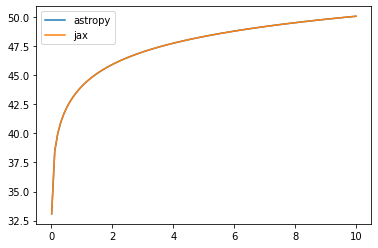

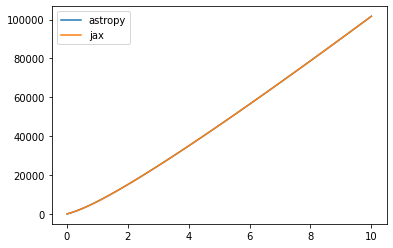

[-2.91594664e-02 -1.18659642e-03 -5.02076286e-04 -1.68921461e-04
 -5.13247730e-04 -5.08791021e-04 -3.91155171e-04 -8.77971668e-05
 -6.02493743e-05 -5.02902285e-05 -5.86767875e-05 -1.72884933e-04
 -1.92016500e-04 -5.97147986e-05 -1.43988510e-04 -8.36225866e-05
 -1.29594947e-04 -5.84437323e-06 -1.06452792e-04 -1.04336348e-04
 -3.61414379e-05 -4.14737039e-05 -7.40486193e-05 -8.66999426e-05
 -8.25677941e-05 -7.74165117e-05 -7.16571889e-05 -6.97694249e-05
 -6.66723209e-05 -6.56341524e-05 -7.02994936e-05 -6.59363368e-05
 -5.46303863e-05 -3.37032107e-05 -8.82955263e-06 -2.65328173e-05
 -4.67176926e-05 -5.57422188e-05 -3.85261219e-05 -4.02749336e-07
 -3.86918500e-05 -4.81722821e-05 -2.93719685e-05 -1.54699663e-05
 -4.50455978e-05 -3.95214218e-05 -1.25381428e-05 -4.28647550e-05
 -2.99115870e-05 -2.14835912e-05 -4.18396508e-05 -1.51469761e-05
 -3.60973995e-05 -3.40084742e-05 -2.05924984e-05 -3.63815894e-05
 -1.80060978e-06 -3.74615210e-05 -1.39011291e-05 -3.21159480e-05
 -2.29118706e-05 -2.90935

In [8]:
import numpy as np
from matplotlib import pyplot as plt

import jax_cosmo as jc
from jax_cosmo import Cosmology, background

from astropy.cosmology import FlatLambdaCDM,wCDM
from astropy.coordinates import Distance

zr=np.linspace(0.01,10,100)



cosmo =FlatLambdaCDM(H0=73.24, Om0=0.28)



d=np.array(Distance(z=zr, cosmology=cosmo))

print(d-np.array(cosmo.luminosity_distance(zr)))


mu=5*np.log10(d*1e6/10)




plt.plot(zr,mu,label='astropy')


cosmo_jax = Cosmology(Omega_c=0.28, h=0.7324, w0=-1, Omega_b=0, n_s= 0.96, sigma8=200000, Omega_k=0, wa=0)


d2=background.transverse_comoving_distance(cosmo_jax, 1/(1+zr))
mu2=5*np.log10((1+zr)/0.7324*d2*1e6/10)
plt.plot(zr,mu2,label='jax')
plt.legend()
plt.show()

plt.plot(zr,d,label='astropy')
plt.plot(zr,d2*(1+zr)/0.7324,label='jax')
plt.legend()
plt.show()



print(mu-mu2)

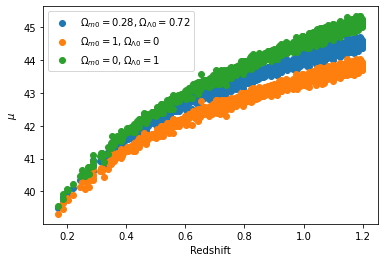

In [3]:
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import Distance

sne=1000

u=np.random.rand(sne)

red=(3*u)**(1/3)/(3)**(1/3)*1.2


noise=np.random.normal(0,0.1,sne)


cosmo = FlatLambdaCDM(H0=73.24, Om0=0.28)




d=np.array(Distance(z=red, cosmology=cosmo))     

mu=5*np.log10(d*1e6/10)+noise



plt.scatter(red,mu,label='$\Omega_{m0}=0.28,\Omega_{\Lambda 0}=0.72$')



cosmo = FlatLambdaCDM(H0=73.24, Om0=1)
d=np.array(Distance(z=red, cosmology=cosmo)) 
mu=5*np.log10(d*1e6/10)+noise     
plt.scatter(red,mu,label='$\Omega_{m0}=1,\Omega_{\Lambda 0}=0$')


cosmo = FlatLambdaCDM(H0=73.24, Om0=0)

d=np.array(Distance(z=red, cosmology=cosmo)) 
mu=5*np.log10(d*1e6/10)+noise     
       
plt.scatter(red,mu,label='$\Omega_{m0}=0,\Omega_{\Lambda 0}=1$')
plt.xlabel('Redshift')
plt.ylabel('$\mu$')
plt.legend()
plt.show()

(array([ 11.,  23.,  43.,  47.,  61.,  92., 119., 168., 193., 243.]),
 array([0.16879385, 0.2718426 , 0.37489136, 0.47794011, 0.58098887,
        0.68403763, 0.78708638, 0.89013514, 0.99318389, 1.09623265,
        1.1992814 ]),
 <BarContainer object of 10 artists>)

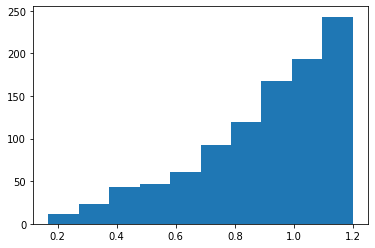

In [4]:
plt.hist(red)

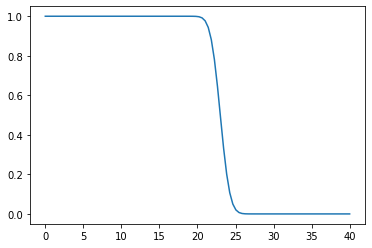

In [5]:
from scipy.stats import norm

x=np.linspace(-0,40,100)
norm.ppf(0.025)





plt.plot(x,norm.cdf(-x,loc=-23,scale=1))



plt.show()

[24.08196261 24.44415189 23.9214529  ... 24.81311043 24.21061723
 23.18355234]


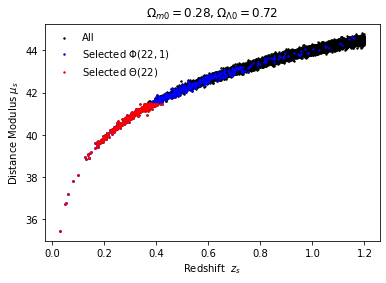

In [6]:
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import Distance

sne=10000

u=np.random.rand(sne)

red=(3*u)**(1/3)/(3)**(1/3)*1.2

noise=np.random.normal(0,0.1,sne)


cosmo = FlatLambdaCDM(H0=73.24, Om0=0.28)

plt.title(r'$\Omega_{m0}=0.28,\Omega_{\Lambda 0}=0.72$')


d=np.array(Distance(z=red, cosmology=cosmo))     

mu=5*np.log10(d*1e6/10)+noise


m=-19.5+mu


prob_sel=norm.cdf(-m,loc=-22,scale=1)
print(m)

draw=np.random.rand(sne)

sel=np.zeros(sne)

sel[draw<prob_sel]=1

sel2=m<22


plt.scatter(red,mu,label='All',color='black',s=2)

plt.scatter(red[sel==1],mu[sel==1],label=r'Selected $\Phi(22,1)$',color='blue',s=2)
plt.scatter(red[sel2==1],mu[sel2==1],label=r'Selected $\Theta(22)$',color='red',s=2)


plt.xlabel(r'Redshift  $z_s$')
plt.ylabel('Distance Modulus $\mu_s$')
plt.legend(frameon=False)
plt.savefig('toyselec.pdf')
plt.show()

In [ ]:
bins=np.linspace(0,1.2,50)
#plt.hist(red,bins=bins)
plt.hist(red[sel==1],bins=bins)
plt.show()